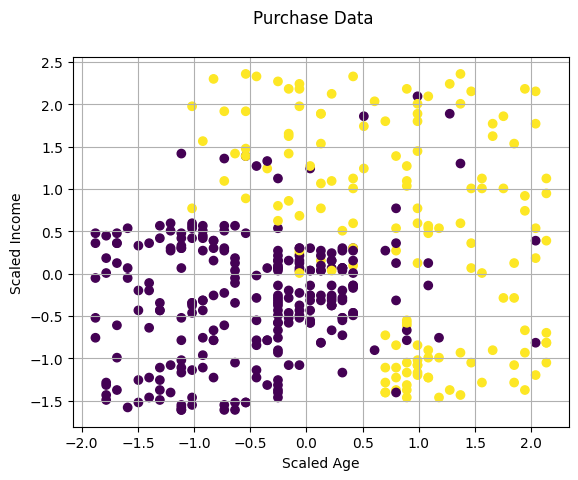

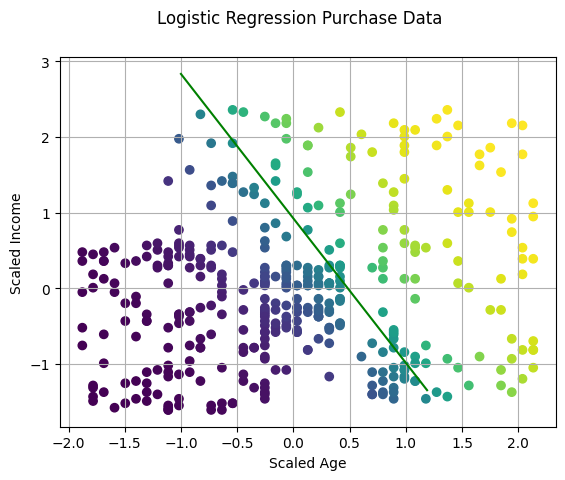

Confusion matrix of Logistic Regression is 
 [[57  1]
 [ 5 17]] 

Accuracy score of Logistic Regression is 92.5 %



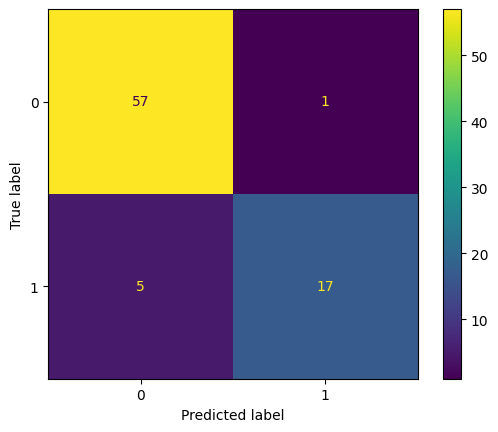

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

def sigmoid(x):
  return 1/(1 + np.exp(-x))

purchaseData = pd.read_csv('Purchase_Logistic.csv')

#Logistic-Regression-Social-Network-Ads
#Using Logistic Regression model to predict if a person is
#going to buy a new car or not based on the available data

#Problem
#A company is planning to launch a campaign for their new car brand
#and would like to analyze which customers are most likely to
#purchase the car so that the ads can specifically target them
#To achieve this, they consult a social network advertising company
#that possesses the data from another similar campaign.
#It is now desired to construct a model to achieve the above goal.

#Dataset
#The dataset contains 400 entries for each of the features
#userId
#gender
#age
#estimatedsalary

#The target is
#purchased history
#The features taken into account are age and estimated salary which are
#required to predict if the user will purchase a new car (1=Yes, 0=No)

X = purchaseData.iloc[:, [2, 3]]
Y = purchaseData.iloc[:, 4]

scaler = StandardScaler();
X = scaler.fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest \
= train_test_split(X, Y, test_size = 0.20, random_state = 0)

logr = LogisticRegression()
logr.fit(Xtrain, Ytrain)
Ypred = logr.predict(Xtest)

plt.figure(1);
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.suptitle('Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

col = sigmoid(np.dot(X, np.transpose(logr.coef_)) + logr.intercept_)
cf = logr.coef_;
xplot = np.arange(-1.0,1.2,0.01);
yplot = -(cf[0,0]*xplot + logr.intercept_)/cf[0,1]

plt.figure(2);
plt.scatter(X[:, 0], X[:, 1], c = col)
plt.plot(xplot,yplot,'g')
plt.suptitle('Logistic Regression Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

cmat = confusion_matrix(Ytest, Ypred)
print('Confusion matrix of Logistic Regression is \n',cmat,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()

LRscore = accuracy_score(Ypred,Ytest)
print('Accuracy score of Logistic Regression is',100*LRscore,'%\n')